In [1]:
import pandas as pd

df = pd.read_csv("heartfailrecords.csv")
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


Always create a copy of the original csv data! 

In [2]:
dfcopy = df.copy()
dfcopy

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


Lets start the preprocessing process. We will check for NULL values, wrong data, wrong format, and duplicates

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


So... the data looks like it has already been "cleaned"/processed. Now it's time to ask our questions based off of this dataframe and create a model that can help us make a conclusion

Research Question:

High blood pressure, increased sodium levels, and well ofcourse old age are common factors that many people who have heart problems posess. However, through out my experiences in life I've always noticed that men are the ones dying from heart problems. This caused me to wonder if men are at a higher risk of death in comparison to women.

Lets begin with understanding how many men and women are in this data set: 

In [4]:
gender = df["sex"]
gender
total_people = len(dfcopy["sex"])
total_people #299

total_male = 0
for x in gender:
    if x == 1:
        total_male = total_male + 1

total_female = total_people - total_male


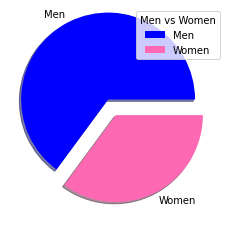

In [5]:
import matplotlib.pyplot as plt
import numpy as np

genderArray = [total_male,total_female]
genderLabels = ["Men", "Women"]
genderColors = ["Blue", "Hotpink"]
genderExplode = [0.2,0.0]

plt.pie(genderArray, labels =genderLabels, shadow=True, colors = genderColors, explode = genderExplode)
plt.legend(title="Men vs Women")
plt.show()

Here we can that around a third of the data set is women and the rest are men. 
105 - women
194 - men

Lets dive into how many men and women have died.

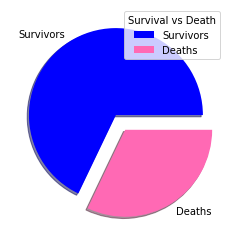

In [6]:
death_col = df["DEATH_EVENT"]
total_deaths = 0


for x in death_col:
    if x == 1:
        total_deaths += 1
total_deaths #96 total deaths 

total_survivors = total_people - total_deaths
total_survivors #203 people

survivalArray = [total_survivors,total_deaths]
survivalLabels = ["Survivors", "Deaths"]
survivalColors = ["Blue","Hotpink"]
survivalExplode = [0.0,0.2]

plt.pie(survivalArray, labels=survivalLabels, colors = survivalColors, explode = survivalExplode, shadow=True)
plt.legend(title ="Survival vs Death")
plt.show()

From the survival pie chart above one can conclude that once heart failure occurs, you have roughly a 1 in 3 chance of dying. However, this data isnt specific enough to answer our original research question. Lets see how many of these deaths are men in comparison to women.

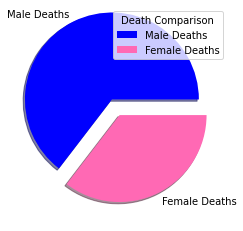

In [7]:
gender_death_col = df[["sex","DEATH_EVENT"]]
gender_death_col

male_death = 0
female_death =0

for i, rows in gender_death_col.iterrows():
    if rows["sex"] == 1 and rows["DEATH_EVENT"] == 1: #Looks for male deaths
        male_death +=1
    elif rows["sex"]==0 and rows["DEATH_EVENT"] == 1: #Looks for female deaths
        female_death +=1

male_death #62
female_death #34

gender_deathArray = [male_death,female_death]
gender_deathLabels = ["Male Deaths","Female Deaths"]
gender_deathColors = ["Blue","Hotpink"]
gender_deathExplode = [0.2,0.0]

plt.pie(gender_deathArray, labels = gender_deathLabels, colors= gender_deathColors, explode = gender_deathExplode, shadow=True )
plt.legend(title="Death Comparison")
plt.show()

Judging solely based off of the visuals we can conclude that approximately 2/3 of the data set are men and 2/3 of the deaths are also men. We can also conclude that approximately 1/3 of the data set is female and 1/3 of the deaths with heart failure are female.

This data insists that there with heart failure both genders are roughly equally suceptible to death.

Next, lets find out exactly how suceptable are both genders? Lets get some numbers.

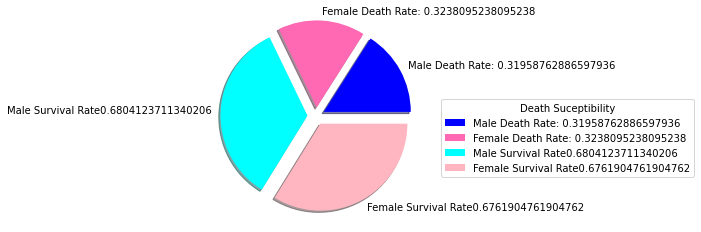

In [8]:
male_suceptibility = male_death/total_male
female_suceptibility = female_death / total_female
male_survivalrate = (1 - male_suceptibility)
female_survivalrate = (1- female_suceptibility)

suceptibilityArray = [male_suceptibility,female_suceptibility, male_survivalrate, female_survivalrate ]
suceptibilityLabels = ["Male Death Rate: " + str(male_suceptibility) ,"Female Death Rate: " + str(female_suceptibility),"Male Survival Rate" + str(male_survivalrate), "Female Survival Rate"+ str(female_survivalrate)]
suceptibilityColors = ["Blue","Hotpink", "Aqua", "lightpink"]
suceptibilityExplode = [0.1,0.1,0.1,0.1]

plt.pie(suceptibilityArray, labels = suceptibilityLabels, colors = suceptibilityColors, explode = suceptibilityExplode, shadow=True )
plt.legend(title="Death Suceptibility" ,bbox_to_anchor = (1.05, 0.6))
plt.show()

To be exact, a man is 1% more suceptible to death after experiencing heart failure in comparison to a women. So far the data is VERY similar. 

To look deeper into this, lets see if blood pressure, old age, and gender play any role in changing the death rate.

Before we start our model, we need to define what is considered old age. Our definition of old age will be any body in the data set thats older 45. Now, lets isolate our dependent and independent variables.

We now need to choose a classification algorithm to determine which factors have an effect on death. Because death is a dichotomous variable (meaning there are only to options... the person died or didnt die), the best algorithm to use is Logistic Regression.

In [9]:
#lets grab our predictors...

X = df[["age","high_blood_pressure","sex"]]
X.shape

(299, 3)

In [10]:
#lets grab out indepenent variable 

y = df["DEATH_EVENT"]
y

0      1
1      1
2      1
3      1
4      1
      ..
294    0
295    0
296    0
297    0
298    0
Name: DEATH_EVENT, Length: 299, dtype: int64

Okay, so now we have our variables! Now we can split our data into training and testing sets.

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
X_train.shape


(209, 3)

The data is split into an 80-20 split for good practice. Now we need to instantiate the logistic regression class and fit the model.

In [12]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression() 

my_model = model.fit(X_train,y_train) 


Its now appropriate to run a K-fold cross validtation to further train our model. We will run a 10 fold cross validation. This basically means we will split our training set into 10 seperate sets with 1 set being a "test set" and we will change that test set every time and train our training set.

In [13]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(my_model, X_train, y_train, scoring = "r2", cv =10)
scores

array([-0.3125    , -0.16666667, -0.4       , -0.16666667, -0.4       ,
       -0.4       , -0.63333333, -0.16666667, -0.16666667, -0.06666667])

In [14]:
np.mean(scores)

-0.2879166666666667

These scores are terribly low so lets try a different classification model... lets utilize random forest classfication.

In [21]:
from sklearn.ensemble import RandomForestClassifier 

rfc_model = RandomForestClassifier()
rfc_model.fit(X,y)

rfc_model.score(X_test,y_test)

0.7777777777777778

We have successfully created a pretty accurate model that scores at 78% which is fairly good. We can conclude that there is a strong positive correlation between age, high blood pressure, and gener with the event of dying.

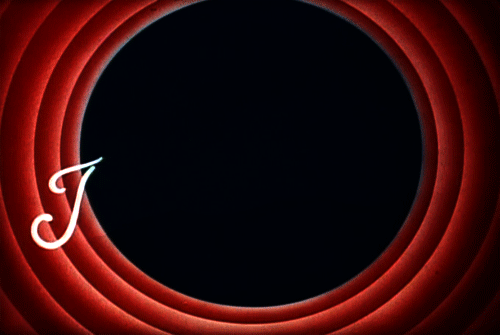